In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

The image label is:  [6]


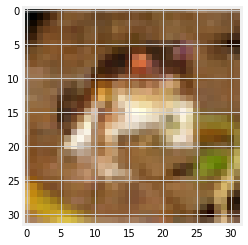

In [7]:
img = plt.imshow(x_train[index])
print('The image label is: ', y_train[index])



In [8]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [9]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
print('The one hot label is:', y_train_one_hot[0])


The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
model = Sequential()


In [14]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [16]:
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Flatten())


In [18]:
model.add(Dense(1000, activation='relu'))


In [19]:
model.add(Dropout(0.5))


In [20]:
model.add(Dense(500, activation='relu'))


In [21]:
model.add(Dropout(0.5))


In [22]:
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [23]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.2 )

Epoch 1/10
157/157 [==============================] - 81s 515ms/step - loss: 1.7755 - accuracy: 0.3343 - val_loss: 1.4343 - val_accuracy: 0.4848
Epoch 2/10
157/157 [==============================] - 80s 513ms/step - loss: 1.3628 - accuracy: 0.5018 - val_loss: 1.3221 - val_accuracy: 0.5317
Epoch 3/10
157/157 [==============================] - 81s 513ms/step - loss: 1.1807 - accuracy: 0.5788 - val_loss: 1.0837 - val_accuracy: 0.6176
Epoch 4/10
157/157 [==============================] - 81s 514ms/step - loss: 1.0652 - accuracy: 0.6229 - val_loss: 1.0429 - val_accuracy: 0.6417
Epoch 5/10
157/157 [==============================] - 81s 514ms/step - loss: 0.9653 - accuracy: 0.6594 - val_loss: 0.9573 - val_accuracy: 0.6736
Epoch 6/10
157/157 [==============================] - 81s 513ms/step - loss: 0.8856 - accuracy: 0.6894 - val_loss: 0.8977 - val_accuracy: 0.6907
Epoch 7/10
157/157 [==============================] - 81s 514ms/step - loss: 0.7983 - accuracy: 0.7205 - val_loss: 0.8884 - val_ac

In [26]:
model.evaluate(x_test, y_test_one_hot)[1]


313/313 [==============================] - 7s 21ms/step - loss: 0.8855 - accuracy: 0.7011


0.7010999917984009

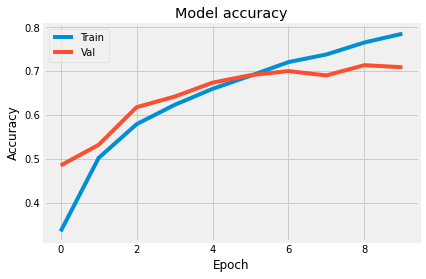

In [27]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

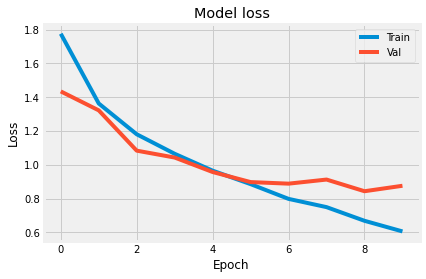

In [28]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [31]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
new_image = plt.imread("cat.jpg") #Read in the image (3, 14, 20)

Saving cat.jpg to cat (2).jpg


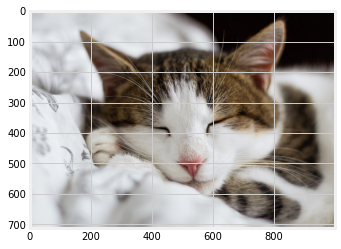

In [32]:
img = plt.imshow(new_image)


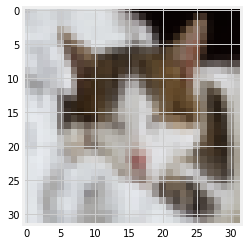

In [33]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [34]:
predictions = model.predict(np.array( [resized_image] ))


In [36]:
predictions

array([[1.3267997e-04, 3.2467215e-05, 5.0775288e-03, 6.0879987e-01,
        1.3421356e-03, 3.7891042e-01, 1.1210856e-03, 4.1471864e-03,
        6.7244830e-05, 3.6930732e-04]], dtype=float32)

In [37]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[3, 5, 2, 7, 4, 6, 9, 0, 8, 1]


In [38]:
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 60.88 %
dog : 37.89 %
bird : 0.51 %
horse : 0.41 %
deer : 0.13 %


In [39]:
model.save('my_model.h5')

In [40]:
from keras.models import load_model
model = load_model('my_model.h5')